In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_excel('MIBridges.xlsx')

In [88]:
df.head()

,1 - State Name,8 - Structure Number,22 - Owner Agency,Average Temperature,CAT10 - Bridge Condition,Bridge Age (yr),29 - Average Daily Traffic,49 - Structure Length (ft.),43A - Main Span Material,27 - Year Built
0,'Michigan',9956,'State Highway Agency',10.0,'Fair',31,16311,147.0,'Steel',1991
1,'Michigan',6202,'County Highway Agency',10.8,'Poor',48,6400,27.9,'Prestressed Concrete',1974
2,'Michigan',9920,'County Highway Agency',10.0,'Fair',75,3850,134.8,'Steel',1947
3,'Michigan',6142,'State Highway Agency',10.2,'Fair',75,49601,357.9,'Steel',1947
4,'Michigan',6141,'State Highway Agency',10.2,'Fair',59,49601,357.9,'Steel',1963


In [89]:
print(df.shape)
print(df.columns)

(1235, 10)
Index(['1 - State Name', '8 - Structure Number', '22 - Owner Agency',
       'Average Temperature', 'CAT10 - Bridge Condition', 'Bridge Age (yr)',
       '29 - Average Daily Traffic', '49 - Structure Length (ft.)',
       '43A - Main Span Material', '27 - Year Built'],
      dtype='object')


In [90]:
print("Bridge condition count: ", df['CAT10 - Bridge Condition'].value_counts())
print('**************')


Bridge condition count:  'Fair'    728
'Poor'    375
'Good'    132
Name: CAT10 - Bridge Condition, dtype: int64
**************


In [91]:
eda = df.groupby('CAT10 - Bridge Condition').agg({'27 - Year Built': ['mean', 'max', 'min'],
                                                    'Bridge Age (yr)': ['mean', 'max', 'min'],
                                                    '29 - Average Daily Traffic': ['mean', 'max', 'min'],
                                                    '49 - Structure Length (ft.)': ['mean', 'max', 'min']}).reset_index()
eda

CAT10 - Bridge Condition 27 - Year Built             Bridge Age (yr)       \
                                      mean   max   min            mean  max   
0                   'Fair'     1956.112637  2012  1876       65.825549  146   
1                   'Good'     1970.007576  2021  1871       51.924242  151   
2                   'Poor'     1938.509333  1998  1890       82.944000  132   

      29 - Average Daily Traffic             49 - Structure Length (ft.)  \
  min                       mean     max min                        mean   
0   9                7871.693681  192000   2                  102.218956   
1   1                7254.121212  164804  10                   69.123485   
2  21                2858.765333   93000   0                   61.496800   

                 
      max   min  
0  2344.5  20.0  
1   350.1  20.0  
2   998.0  20.3

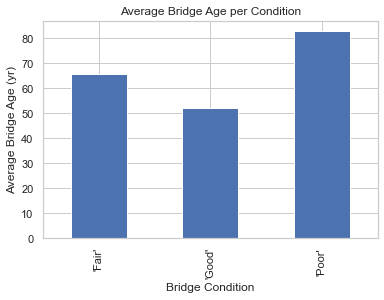

In [129]:
df.groupby('CAT10 - Bridge Condition')['Bridge Age (yr)'].mean().plot(kind='bar')
plt.xlabel('Bridge Condition')
plt.ylabel('Average Bridge Age (yr)')
plt.title('Average Bridge Age per Condition')
plt.show()

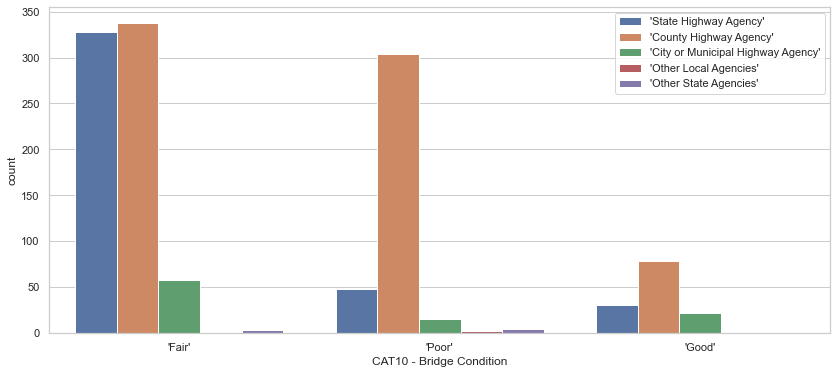

In [123]:
plt.figure(figsize=(14, 6))
sns.countplot(x="CAT10 - Bridge Condition", hue="22 - Owner Agency", data=df)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

In [94]:
materialsused = df['43A - Main Span Material'].value_counts()
materialsused


'Steel'                              574
'Prestressed Concrete'               360
'Concrete'                           206
'Wood or Timber'                      59
'Steel Continuous'                    23
'Concrete Continuous'                 11
'Prestressed Concrete Continuous'      2
Name: 43A - Main Span Material, dtype: int64

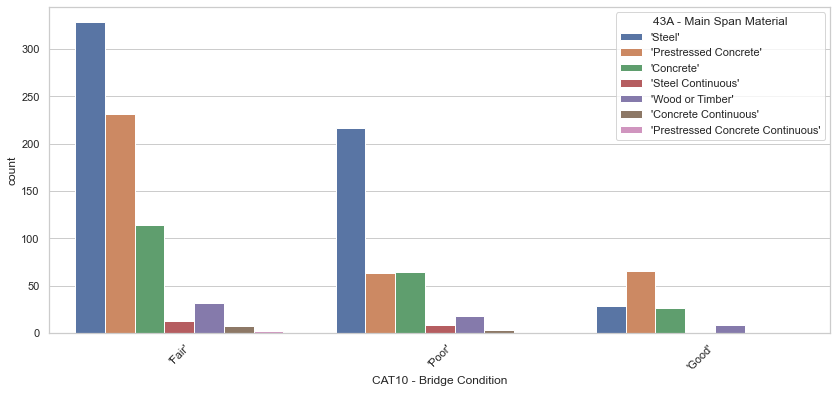

In [117]:
plt.figure(figsize=(14, 6))
sns.set_theme(style="whitegrid")
sns.countplot(x="CAT10 - Bridge Condition", hue='43A - Main Span Material', data=df)
plt.xticks(rotation=45)
plt.show()

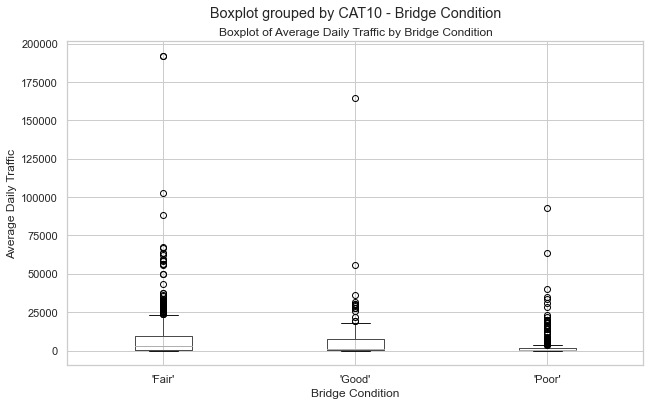

In [127]:
traffic_condition = df[['29 - Average Daily Traffic', 'CAT10 - Bridge Condition']]
traffic_condition.boxplot(by='CAT10 - Bridge Condition', figsize=(10, 6))
plt.title('Boxplot of Average Daily Traffic by Bridge Condition')
plt.xlabel('Bridge Condition')
plt.ylabel('Average Daily Traffic')
plt.show()

In [97]:
countofcondperspan = df.groupby(['CAT10 - Bridge Condition','43A - Main Span Material'])['8 - Structure Number'].count().reset_index(name='Count of Structures')
countofcondperspan


,CAT10 - Bridge Condition,43A - Main Span Material,Count of Structures
0,'Fair','Concrete Continuous',8
1,'Fair','Concrete',114
2,'Fair','Prestressed Concrete Continuous',2
3,'Fair','Prestressed Concrete',231
4,'Fair','Steel Continuous',13
5,'Fair','Steel',328
6,'Fair','Wood or Timber',32
7,'Good','Concrete',27
8,'Good','Prestressed Concrete',66
9,'Good','Steel Continuous',1


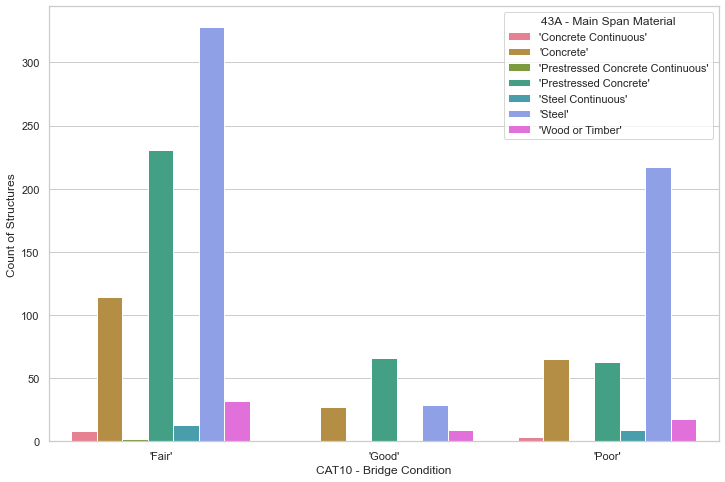

In [126]:
plt.figure(figsize=(12, 8))
sns.barplot(data=countofcondperspan, x='CAT10 - Bridge Condition', y='Count of Structures', hue="43A - Main Span Material", palette='husl')
plt.show()